# HW2 - Type 1 Diabetes

### Theory questions

##### **Question 1**
*To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.*


##### **Answer 1**

Model accuracy is given by the equation : (TP+TN)/(TP+TN+FP+FN). However, model performances is given by the variables : TP, TN, FP, FN, sensityvity (proportion of people with a condition who are correctly identified by a test as indeed having that condition (TP/(TP+FN)), specificity (proportion of people without a condition who are correctly identified by a test as indeed not having the condition TN/(TN+FP)), PPV (TP/(TP+FP)), NPV (TN/(TN+FN)) and F1 score (average between sensitivyty and PPV). (Lecture 08)

In the case of the detection of Type 1 Diabetes, model performances is more important to us than model accuracy. Indeed, model accuracy does not takes in count all of the parameters, and cannot predict in a good way the errors of the model, so it may mislead us. However, using the model performances provides better insights. 
For example, if we get accuracy 0.95 (95%) (like in lecture 08), which is high, we could get the 5% rest that may all be false negatives. So we would have failed in not detecting a lot of people that have T1D and are diagnosed as negatives. And our goal is to detect a maximum of positive people that are indeed positive, and to not miss a lot of positives. (In other words, we want high TP and low FN, and high TN and low FP in the same way). However, with the model performances, we can avoid this error by calculating sensitivity which will tell us the amount of people that have T1D and were diagnosed as well vs people who do are positive too but aren't diagnosed positives.

##### **Question 2**
*T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.*

##### **Answer 2**
 * *Pros and cons of classifier that uses only some of the features:*
    
    **Pros:** 
-	Simplification of the model, easier to interpret, and to extrapolate to other situations.
-	There could be useless or redundant features. In this specific case: the age (A) feature could be directly linked to blood pressure (BP), and the physical activity (P) could be correlated with BMI for example.
-	Less risk of overfitting.
-	Low complexity, lower training time.

    **Cons:**
-	Using only some of the features could create bias (not all patients with high blood pressure are old and vice versa) and therefore underfitting.
-	Loss of information from the non-used features.
-	Less precise results and/or erroneous.


 * *Pros and cons of classifier that uses all available features:*
   
   **Pros:**
-	The more information we use, the more accurate the results will be and the less bias we will get.
-	No loss of information, we may figure unexpected correlations that will help with building the model (classification for example).

    **Cons:** 
-	Results are harder to interpret.
-	High complexity, higher training time.


##### **Question 3**
*A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.*

##### **Answer 3**
Logistic regression and linear SMV are two algorithms with relatively similar performance that will assume that our data is linearly separable. 
A linear SVM will probably give the worst result as it assumes that the data can be linearly separated and only looks for the margins (distance between the line and the support vectors) between them, maybe with very low margins the results will improve.
LR won't give good results either as it assumes too tgat our data is linearly separable.

We will advise the histologist to use nonlinear SMV as the difference between the pancreas isn't linear and are difficult to distinguish. 

It is important to precise that not one algorithm will solve all types of problems, so generally, it is usually advisable to first try to use LR to see how the model does, if it fails then you can try using nonlinear SVM.

##### **Question 4**
*What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?*

##### **Answer 4**
* Differences between LR and linear SVM:
LR and linear SVM are supervised machine learning algorithms. They are both used to solve classification problems (sorting data into categories). SVM tries to maximize the margin between the closest support vectors, while LR tries to maximize the posterior class probability. 
Moreover, SVM works well with unstructured and semi-structured data like text and images while LR works with already identified independent variables.
An other difference is the risk of overfitting : the risk of overfitting is less in SVM, while LR is vulnerable to it.

* Differences in the effect/concept of their hyper-parameters tuning:
Most of the machine learning and deep learning algorithms have some parameters that can be adjusted which are called hyperparameters. We need to set hyperparameters before we train the models.

In LR, the hyperparameters are the learning rate and regularization parameter. The learning rate controls how quickly the model is adapted to the problem, and the regularization parameter reduces overfitting. 
In SMV, the hyperparameters are also the learning rate, and tradeoff parameter (C). The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.

(For nonlinear kernel SVM we alo use Gamma 𝛾, when we use the Gaussian RBF kernel. 𝛾 decides that how much curvature we want in a decision boundary. When it is high, it means more curvature.)

Credits :

Lecture 09, Lecture 10

https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16

https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

http://pavelbazin.com/post/linear-regression-hyperparameters/

https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

### Coding assignment

In [20]:
import numpy as np         
import itertools
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import norm
import pickle
import sys
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) 
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from IPython.display import display, clear_output
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix   
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
# Importing Data 
df = pd.read_csv('HW2_data.csv')

### **Preprocessing data** 

In [3]:
# replace missing answers with Nans
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

In [4]:
# remove Nans and replace them using random sampling of each series values
def nan2num_samp(df):

    for col in list(df.columns):
        try:
            a = np.array(df[col].value_counts().index)
            size = df[col].value_counts(dropna=False).loc[np.nan]
            p = np.array(df[col].value_counts(normalize=True))

            sample = np.random.choice(a, size=size, p=p)
            index_nan = list(df[df[col].isna()].index)
            for i in range(len(index_nan)):
                df.loc[index_nan[i], col] = sample[i]
        except Exception:
            pass
    return pd.DataFrame(df)

In [5]:
df_clean = nan2num_samp (df_clean)

In [6]:
# remove improbable age if there is
df_clean = df_clean.drop(df_clean[df_clean.Age > 120].index).drop(df_clean[df_clean.Age < 0].index)

In [7]:
# removing output column 
Y = df_clean[['Diagnosis']]
T1D_clean = df_clean.drop(columns=['Diagnosis'])

In [8]:
# move to binary 
Y = pd.get_dummies(data=Y, drop_first=True)
df_clean = pd.get_dummies(data=df_clean, drop_first=True) # keeping copy of whole dataset cleaned 
T1D_clean = pd.get_dummies(data=T1D_clean, drop_first=True) 

In [9]:
T1D_clean.describe() # overview on the cleaned data

,Age,Family History,Gender_Male,Increased Urination_Yes,Increased Thirst_Yes,Sudden Weight Loss_Yes,Weakness_Yes,Increased Hunger_Yes,Genital Thrush_Yes,Visual Blurring_Yes,Itching_Yes,Irritability_Yes,Delayed Healing_Yes,Partial Paresis_Yes,Muscle Stiffness_Yes,Hair Loss_Yes,Obesity_Yes
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,48.169912,0.506195,0.637168,0.483186,0.449558,0.414159,0.571681,0.447788,0.217699,0.449558,0.483186,0.235398,0.461947,0.426549,0.368142,0.357522,0.168142
std,12.295828,0.500405,0.481243,0.500160,0.497890,0.493013,0.495274,0.497707,0.413047,0.497890,0.500160,0.424623,0.498992,0.495014,0.482727,0.479695,0.374323
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Y.describe() # stats of Diagnosis

,Diagnosis_Positive
count,565.000000
mean,0.607080
std,0.488832
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### **Test-train split**

In [11]:
# spliting the data 

X_train, X_test, y_train, y_test = train_test_split(T1D_clean, Y, test_size=0.2, random_state=0, stratify=Y)

### **Data visualization and exploration**

####  Analysis to show that the distribution of the features is similar between test and train

In [12]:
# construction of comparison table for binary features

table_cols = ['Positive Feature', 'Train %', 'Test %', 'Delta Train-Test %']
comp_dis = pd.DataFrame(columns=table_cols) # comp_dis = comparison of distribution
x_train_comp = X_train.drop(['Age'], axis=1).to_numpy()
x_test_comp = X_test.drop(['Age'], axis=1).to_numpy()

#first column
comp_dis['Positive Feature'] = T1D_clean.columns.drop('Age')

#second column
for i, col in enumerate(x_train_comp.transpose()):
    comp_dis.loc[i, 'Train %'] = round((np.sum(col) / col.size) * 100, 1)

#third column 
for i, col in enumerate(x_test_comp.transpose()):
    comp_dis.loc[i, 'Test %'] = round((np.sum(col) / col.size) * 100, 1)

#fourth column
comp_dis['Delta Train-Test %'] = comp_dis['Train %'] - comp_dis['Test %']
    
comp_dis

,Positive Feature,Train %,Test %,Delta Train-Test %
0,Family History,50.2,52.2,-2
1,Gender_Male,63.9,62.8,1.1
2,Increased Urination_Yes,48.2,48.7,-0.5
3,Increased Thirst_Yes,46,40.7,5.3
4,Sudden Weight Loss_Yes,40.3,46,-5.7
5,Weakness_Yes,56.4,60.2,-3.8
6,Increased Hunger_Yes,45.1,43.4,1.7
7,Genital Thrush_Yes,20.6,26.5,-5.9
8,Visual Blurring_Yes,45.8,41.6,4.2
9,Itching_Yes,49.3,44.2,5.1


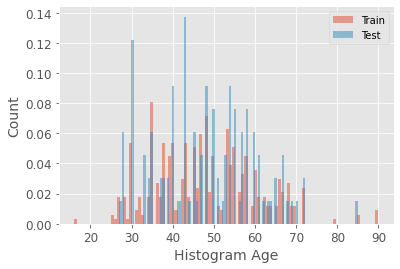

In [13]:
# comparison of distribution for non-binary feature 'Age'

x_train_age = pd.DataFrame(X_train['Age'])
x_test_age = pd.DataFrame(X_test['Age'])

bins = 100
plt.hist(x_train_age, bins, density=True, alpha=0.5, label='Train')
plt.hist(x_test_age, bins, density=True, alpha=0.5, label='Test')
plt.xlabel('Histogram Age')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

In [14]:
mu_train, std_train = norm.fit(x_train_age)
mu_test, std_test = norm.fit(x_test_age)

print("Mu of train is: " + str("{0:.2f}".format(mu_train)) + ", Std of train is:" + str("{0:.2f}".format(std_train)))
print("Mu of test is: " + str("{0:.2f}".format(mu_test)) + ", Std of test is:" + str("{0:.2f}".format(std_test)))


Mu of train is: 48.18, Std of train is:12.34
Mu of test is: 48.12, Std of test is:12.08


##### **Question 3) a**

*i) What issues could an imbalance of features between train and test cause?*
###### *Answer*
An imbalance of features between train and test could cause a false generalization and a false classification, and may not be representative of the reality.

*ii) How can you solve the issue ?*
###### *Answer*
We can solve the issue by adding more data in order to balance the classes, oversample minority classes, undersample majority classes.

####  Plots showing the relationship between feature and label

<AxesSubplot:>

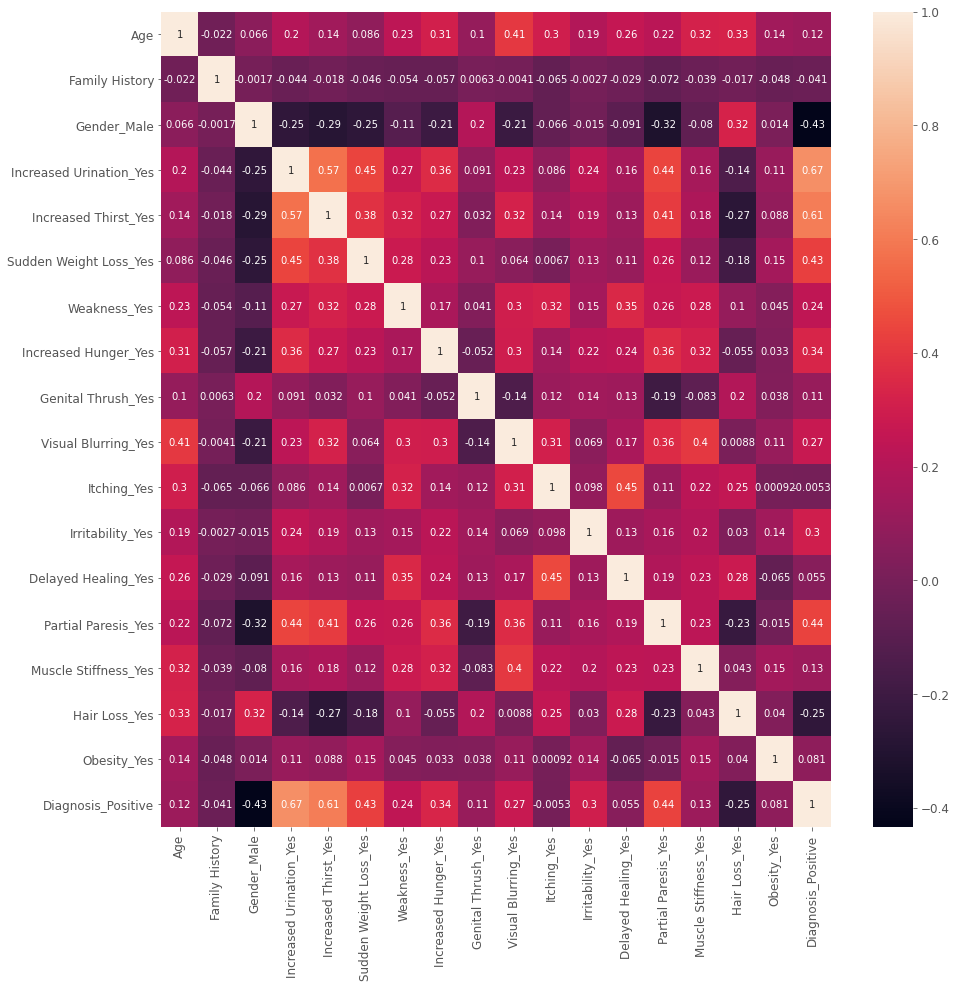

In [15]:
# Heatmap - checking correlation of Diagnosis with other features
plt.figure(figsize = (15,15))
sns.heatmap(df_clean.corr(), annot = True)

The heatmap shows the highest correlations of positive diagnosis to increased urination and increased thirst.

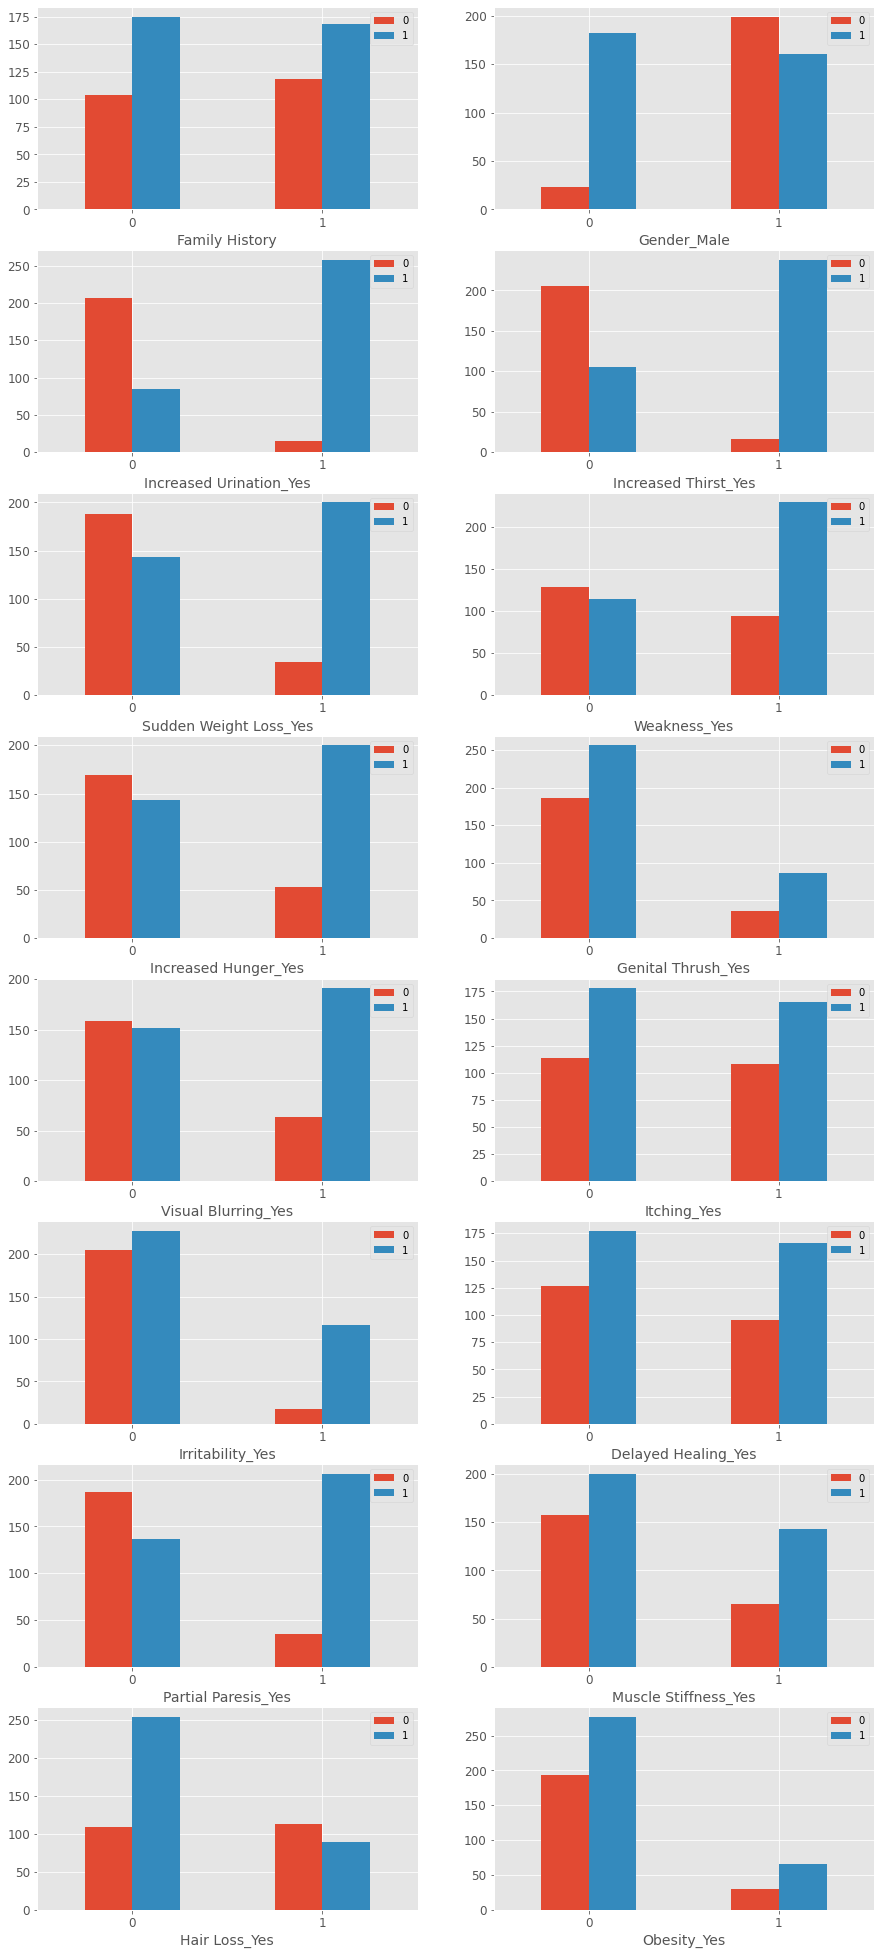

In [41]:
# Plots showing the features' frequency according to Diagnosis

idx=1
plt.figure(figsize=(15, 35))
for col in df_clean.drop(columns=['Age','Diagnosis_Positive']).columns:
    ax = plt.subplot(8, 2, idx)
    df_clean[[col,'Diagnosis_Positive']].groupby(col)['Diagnosis_Positive'].value_counts().unstack().plot.bar(ax=ax, rot=0)
    plt.ylabel='Count'
    plt.legend(loc='upper right')
    idx+=1

# Red bars '0' = Diagnosis Negative
# Blue bars '1' = Diagnosis Positive

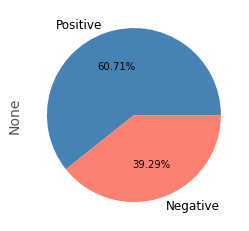

In [17]:
# Pie Diagram for visualization of Diagnosis Proportions

Y.value_counts().plot(kind="pie", labels=['Positive','Negative'], colors = ['steelblue', 'salmon'], autopct='%1.2f%%') 
plt.show()

##### **Question 3) d**

*i) Was there anything unexpected?*
###### *Answer*
Surprisingly, the fact that someone has family history in T1D doesn't affect so much the diagnosis. In addition, we see that the gender influes much on the diagnosis : the amount of negative women is way lower than negative men, when we expected this feature to be balanced. 
We can also remark that obesity isn't a factor to T1D : number of positive non-obese people are way higher than positive obese people.

*ii) Are there any features that you feel will be particularly important to your model? Explain why.*
###### *Answer*
The features that seem particularly important to our model are increased thirst, increased urination and gender (we explained why the gender seems important to look on 3)d.i.).
Indeed, we can see from the graphs that most of people with increased thirst or increased urination are diagnosed positive.

### **Encoding the data as one hot vector**

In [18]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_Diagnosis = enc.fit_transform(Y)
enc_T1D = enc.fit_transform (T1D_clean)

### **Chosing, building and optimizing Machin learning models** 

#### *Linear models*

In [21]:
# Logistic regression - LogReg

lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
pen = ['l1', 'l2']
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
log_reg = LogisticRegression(random_state=5, penalty=pen, C = 1/lmbda, solver='saga')
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg)])
LogReg = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': pen},
                   scoring=['accuracy','f1','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
LogReg.fit(X_train, np.ravel(y_train))
chosen_LogReg = LogReg.best_estimator_

y_pred_test = chosen_LogReg.predict(X_test) 
y_pred_proba_test = chosen_LogReg.predict_proba(X_test)

y_pred_train = chosen_LogReg.predict(X_train) 
y_pred_proba_train = chosen_LogReg.predict_proba(X_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.947, test=0.901) f1: (train=0.957, test=0.919) roc_auc: (train=0.986, test=0.952) total time=   0.1s
[CV 2/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.945, test=0.934) f1: (train=0.954, test=0.944) roc_auc: (train=0.982, test=0.971) total time=   0.0s
[CV 3/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.945, test=0.878) f1: (train=0.955, test=0.897) roc_auc: (train=0.983, test=0.961) total time=   0.0s
[CV 4/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.925, test=0.911) f1: (train=0.939, test=0.929) roc_auc: (train=0.981, test=0.974) total time=   0.0s
[CV 5/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.936, test=0.933) f1: (train=0.947, test=0.947) roc_auc: (train=0.980, test=0.973) total time=   0.0s
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l2; accuracy:

In [22]:
def plot_and_calc (x_test, y_test, y_pred_test, y_pred_proba_test):
   
    plot_confusion_matrix(chosen_LogReg,x_test,y_test, cmap=plt.cm.Blues)
    plt.grid(False)
    plt.show()
    
    calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
    calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
    calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
    calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]
    
    TN = calc_TN(y_test,y_pred_test)
    FP = calc_FP(y_test,y_pred_test)
    FN = calc_FN(y_test,y_pred_test)
    TP = calc_TP(y_test,y_pred_test)
    Se = TP/(TP+FN)
    Sp = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*Se*PPV)/(Se+PPV)
    print('Accuracy is {:.2f}. \nF1 is {:.2f}.'.format(Acc,F1))
    print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


Test set:


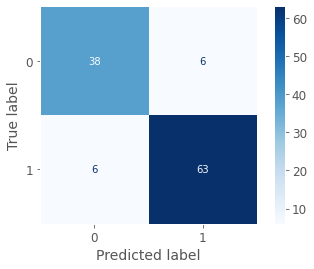

Accuracy is 0.89. 
F1 is 0.91.
AUROC is 0.96
Train set:


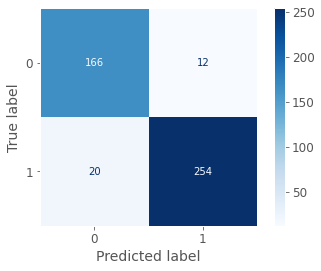

Accuracy is 0.93. 
F1 is 0.94.
AUROC is 0.98


In [23]:
print('Test set:')
plot_and_calc (X_test, y_test, y_pred_test, y_pred_proba_test)
print('Train set:')
plot_and_calc (X_train, y_train, y_pred_train, y_pred_proba_train)

In [24]:
# Linear SVM 
from sklearn.svm import SVC

C = np.array([0.001, 0.01, 1, 10, 100, 1000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, 
             scoring=['accuracy','f1','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train, np.ravel(y_train))
chosen_svm_lin = svm_lin.best_estimator_

y_pred_test = chosen_svm_lin.predict(X_test) 
y_pred_proba_test = chosen_svm_lin.predict_proba(X_test)

y_pred_train = chosen_svm_lin.predict(X_train) 
y_pred_proba_train = chosen_svm_lin.predict_proba(X_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.881, test=0.824) f1: (train=0.906, test=0.864) roc_auc: (train=0.955, test=0.917) total time=   0.1s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.820, test=0.868) f1: (train=0.866, test=0.900) roc_auc: (train=0.955, test=0.979) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.870, test=0.800) f1: (train=0.899, test=0.845) roc_auc: (train=0.957, test=0.916) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.818, test=0.822) f1: (train=0.866, test=0.869) roc_auc: (train=0.954, test=0.964) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.809, test=0.856) f1: (train=0.859, test=0.891) roc_auc: (train=0.954, test=0.952) total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.892, test=0.890) f1: (train=0.908, test=

Test set:


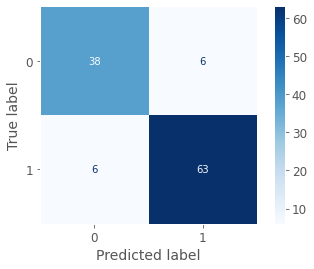

Accuracy is 0.91. 
F1 is 0.93.
AUROC is 0.95
Train set:


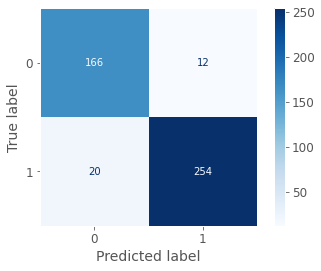

Accuracy is 0.94. 
F1 is 0.95.
AUROC is 0.98


In [25]:
print('Test set:')
plot_and_calc (X_test, y_test, y_pred_test, y_pred_proba_test)
print('Train set:')
plot_and_calc (X_train, y_train, y_pred_train, y_pred_proba_train)

#### *Non-Linear models*

In [26]:
# Non Linear SVM - Kernels: rbf and poly

C = np.array([0.001, 0.01, 1, 10, 100, 1000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe,
                 param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
                 scoring=['accuracy','f1','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train, np.ravel(y_train))
chosen_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred_test = chosen_svm_nonlin.predict(X_test) 
y_pred_proba_test = chosen_svm_nonlin.predict_proba(X_test)

y_pred_train = chosen_svm_nonlin.predict(X_train) 
y_pred_proba_train = chosen_svm_nonlin.predict_proba(X_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.970, test=0.944) total time=   0.1s
[CV 2/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.971, test=0.986) total time=   0.1s
[CV 3/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.600) f1: (train=0.756, test=0.750) roc_auc: (train=0.974, test=0.942) total time=   0.1s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (train=0.973, test=0.970) total time=   0.1s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (tr

Test set:


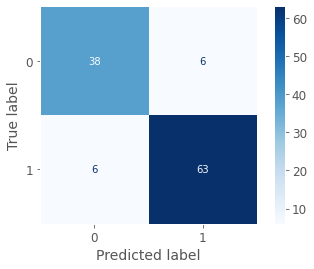

Accuracy is 0.92. 
F1 is 0.93.
AUROC is 0.98
Train set:


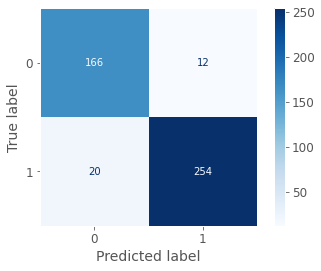

Accuracy is 0.99. 
F1 is 0.99.
AUROC is 1.00


In [27]:
print('Test set:')
plot_and_calc (X_test, y_test, y_pred_test, y_pred_proba_test)
print('Train set:')
plot_and_calc (X_train, y_train, y_pred_train, y_pred_proba_train)

##### **Question 5) c.**
*What performs best on this dataset? Linear or non-linear models?*

###### *Answer*
We can see that the highest values of Accuracy, F1 and AUROC appear all in the non-linear SVM models. 
According to these results, we can assume that non-linear models perform best on this dataset.

### **Feature selection**

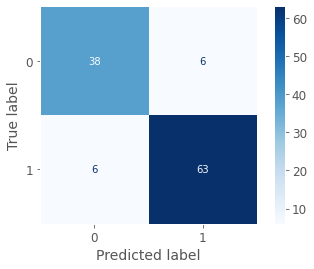

Accuracy is 0.96. 
F1 is 0.97.
AUROC is 0.99


In [28]:
# Random Forest Classifier

from sklearn.metrics import plot_confusion_matrix, roc_auc_score,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, np.ravel(y_train))
y_pred_test = rfc.predict(X_test)
y_pred_proba_test = rfc.predict_proba(X_test)

plot_and_calc (X_test, y_test, y_pred_test, y_pred_proba_test)

In [29]:
feature_imp = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_imp

Increased Urination_Yes    0.232665
Increased Thirst_Yes       0.158055
Gender_Male                0.111457
Age                        0.086018
Partial Paresis_Yes        0.061830
Sudden Weight Loss_Yes     0.045881
Irritability_Yes           0.039705
Hair Loss_Yes              0.039455
Increased Hunger_Yes       0.037140
Delayed Healing_Yes        0.033316
Itching_Yes                0.029517
Genital Thrush_Yes         0.026961
Visual Blurring_Yes        0.024305
Obesity_Yes                0.023561
Weakness_Yes               0.020507
Muscle Stiffness_Yes       0.019546
Family History             0.010082
dtype: float64

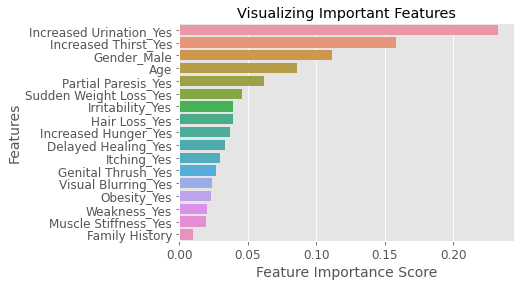

In [30]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

##### **Question 6) a**

*i) What are the 2 most important features according to the random forest?*
###### *Answer*
The two most important features according to the random forest are:
- Increased Urination
- Increased Thirst

*ii) Does this match up exactly with the feature exploration you did?*
###### *Answer*
Yes, this exactly matches up with the feature exploration we did.

### **Data Separability Visualization**

#### *Dimensionality reduction*

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

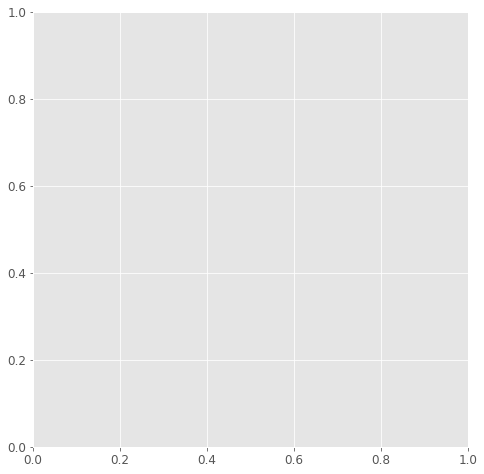

In [31]:
n_components = 2
pca = PCA(n_components=n_components, whiten=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Positive Diagnosis','Negative Diagnosis'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

plt_2d_pca(X_test_pca,y_test)
plt.show()

##### **Question 7) b**
*How separable is your data when reduced to just two features?*
 
###### *Answer*

In [32]:
def calc (x_test, y_test, y_pred_test, y_pred_proba_test):
    
    calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
    calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
    calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
    calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]
    
    TN = calc_TN(y_test,y_pred_test)
    FP = calc_FP(y_test,y_pred_test)
    FN = calc_FN(y_test,y_pred_test)
    TP = calc_TP(y_test,y_pred_test)
    Se = TP/(TP+FN)
    Sp = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*Se*PPV)/(Se+PPV)
    print('Accuracy is {:.2f}. \nF1 is {:.2f}.'.format(Acc,F1))
    print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

#### *Training the same models above on the dimensionality-reduced training set*

In [33]:
#Logistic regression
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
pen = ['l1', 'l2']
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
log_reg_2d = LogisticRegression(random_state=5, penalty=pen, C = 1/lmbda, solver='saga')
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg_2d)])
LogReg2D = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': pen},
                   scoring=['accuracy','f1','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
LogReg2D.fit(X_train_pca, np.ravel(y_train))
chosen_LogReg2D = LogReg2D.best_estimator_

y_pred_test_2d = chosen_LogReg2D.predict(X_test_pca) 
y_pred_proba_test_2d = chosen_LogReg2D.predict_proba(X_test_pca)

y_pred_train_2d = chosen_LogReg2D.predict(X_train_pca) 
y_pred_proba_train_2d = chosen_LogReg2D.predict_proba(X_train_pca)

print('Test set:')
calc (X_test_pca, y_test, y_pred_test_2d, y_pred_proba_test_2d)
print('Train set:')
calc (X_train_pca, y_train, y_pred_train_2d, y_pred_proba_train_2d)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.845, test=0.758) f1: (train=0.872, test=0.800) roc_auc: (train=0.931, test=0.868) total time=   0.0s
[CV 2/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.834, test=0.879) f1: (train=0.860, test=0.901) roc_auc: (train=0.912, test=0.955) total time=   0.0s
[CV 3/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.837, test=0.822) f1: (train=0.865, test=0.849) roc_auc: (train=0.928, test=0.889) total time=   0.0s
[CV 4/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.845, test=0.856) f1: (train=0.872, test=0.876) roc_auc: (train=0.917, test=0.932) total time=   0.0s
[CV 5/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.823, test=0.856) f1: (train=0.853, test=0.887) roc_auc: (train=0.916, test=0.936) total time=   0.0s
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l2; accuracy:

In [34]:
# Linear SVM 

C = np.array([0.001, 0.01, 1, 10, 100, 1000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin_2d = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, 
             scoring=['accuracy','f1','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin_2d.fit(X_train_pca, np.ravel(y_train))
chosen_svm_lin_2d = svm_lin_2d.best_estimator_

y_pred_test_2d = chosen_svm_lin_2d.predict(X_test_pca) 
y_pred_proba_test_2d = chosen_svm_lin_2d.predict_proba(X_test_pca)

y_pred_train_2d = chosen_svm_lin_2d.predict(X_train_pca) 
y_pred_proba_train_2d = chosen_svm_lin_2d.predict_proba(X_train_pca)

print('Test set:')
calc (X_test_pca, y_test, y_pred_test_2d, y_pred_proba_test_2d)
print('Train set:')
calc (X_train_pca, y_train, y_pred_train_2d, y_pred_proba_train_2d)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.916, test=0.831) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.896, test=0.947) total time=   0.1s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.608, test=0.600) f1: (train=0.756, test=0.750) roc_auc: (train=0.909, test=0.871) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (train=0.899, test=0.938) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (train=0.902, test=0.917) total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.848, test=0.725) f1: (train=0.872, test=

In [35]:
# Non Linear SVM - Kernels: rbf and poly

C = np.array([0.001, 0.01, 1, 10, 100, 1000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin_2d = GridSearchCV(estimator=pipe,
                 param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
                 scoring=['accuracy','f1','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin_2d.fit(X_train_pca, np.ravel(y_train))
chosen_svm_nonlin_2d = svm_nonlin_2d.best_estimator_
print(svm_nonlin_2d.best_params_)

y_pred_test_2d = chosen_svm_nonlin_2d.predict(X_test_pca) 
y_pred_proba_test_2d = chosen_svm_nonlin_2d.predict_proba(X_test_pca)

y_pred_train_2d = chosen_svm_nonlin_2d.predict(X_train_pca) 
y_pred_proba_train_2d = chosen_svm_nonlin_2d.predict_proba(X_train_pca)

print('Test set:')
calc (X_test_pca, y_test, y_pred_test_2d, y_pred_proba_test_2d)
print('Train set:')
calc (X_train_pca, y_train, y_pred_train_2d, y_pred_proba_train_2d)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.921, test=0.846) total time=   0.1s
[CV 2/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.908, test=0.954) total time=   0.1s
[CV 3/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.600) f1: (train=0.756, test=0.750) roc_auc: (train=0.916, test=0.885) total time=   0.1s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (train=0.913, test=0.925) total time=   0.1s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (tr

#### *Training the same models on the best two features from section 6*

In [36]:
# Best two features form section 6: Increased Urination, Increased Thirst

X_train_2d = X_train[['Increased Thirst_Yes','Increased Urination_Yes']]
X_test_2d = X_test[['Increased Thirst_Yes','Increased Urination_Yes']]

In [37]:
#Logistic regression
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
pen = ['l1', 'l2']
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
log_reg_2d = LogisticRegression(random_state=5, penalty=pen, C = 1/lmbda, solver='saga')
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg_2d)])
LogReg2D = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': pen},
                   scoring=['accuracy','f1','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
LogReg2D.fit(X_train_2d, np.ravel(y_train))
chosen_LogReg2D = LogReg2D.best_estimator_

y_pred_test_2d = chosen_LogReg2D.predict(X_test_2d) 
y_pred_proba_test_2d = chosen_LogReg2D.predict_proba(X_test_2d)

y_pred_train_2d = chosen_LogReg2D.predict(X_train_2d) 
y_pred_proba_train_2d = chosen_LogReg2D.predict_proba(X_train_2d)

print('Test set:')
calc (X_test_2d, y_test, y_pred_test_2d, y_pred_proba_test_2d)
print('Train set:')
calc (X_train_2d, y_train, y_pred_train_2d, y_pred_proba_train_2d)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.867, test=0.846) f1: (train=0.887, test=0.868) roc_auc: (train=0.910, test=0.886) total time=   0.0s
[CV 2/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.856, test=0.890) f1: (train=0.879, test=0.902) roc_auc: (train=0.904, test=0.912) total time=   0.0s
[CV 3/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.870, test=0.833) f1: (train=0.890, test=0.854) roc_auc: (train=0.911, test=0.864) total time=   0.0s
[CV 4/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.851, test=0.911) f1: (train=0.873, test=0.926) roc_auc: (train=0.896, test=0.943) total time=   0.0s
[CV 5/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.870, test=0.833) f1: (train=0.888, test=0.867) roc_auc: (train=0.908, test=0.897) total time=   0.0s
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l2; accuracy:

In [38]:
# Linear SVM 

C = np.array([0.001, 0.01, 1, 10, 100, 1000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin_2d = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, 
             scoring=['accuracy','f1','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin_2d.fit(X_train_2d, np.ravel(y_train))
chosen_svm_lin_2d = svm_lin_2d.best_estimator_

y_pred_test_2d = chosen_svm_lin_2d.predict(X_test_2d) 
y_pred_proba_test_2d = chosen_svm_lin_2d.predict_proba(X_test_2d)

y_pred_train_2d = chosen_svm_lin_2d.predict(X_train_2d) 
y_pred_proba_train_2d = chosen_svm_lin_2d.predict_proba(X_train_2d)

print('Test set:')
calc (X_test_2d, y_test, y_pred_test_2d, y_pred_proba_test_2d)
print('Train set:')
calc (X_train_2d, y_train, y_pred_train_2d, y_pred_proba_train_2d)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.910, test=0.886) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.904, test=0.912) total time=   0.1s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.608, test=0.600) f1: (train=0.756, test=0.750) roc_auc: (train=0.909, test=0.889) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (train=0.896, test=0.943) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (train=0.908, test=0.897) total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.834, test=0.802) f1: (train=0.848, test=

/opt/anaconda3/envs/bm-336546-hw2/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/bm-336546-hw2/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


In [39]:
# Non Linear SVM - Kernels: rbf and poly

C = np.array([0.001, 0.01, 1, 10, 100, 1000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin_2d = GridSearchCV(estimator=pipe,
                 param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
                 scoring=['accuracy','f1','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin_2d.fit(X_train_2d, np.ravel(y_train))
chosen_svm_nonlin_2d = svm_nonlin_2d.best_estimator_
print(svm_nonlin_2d.best_params_)

y_pred_test_2d = chosen_svm_nonlin_2d.predict(X_test_2d) 
y_pred_proba_test_2d = chosen_svm_nonlin_2d.predict_proba(X_test_2d)

y_pred_train_2d = chosen_svm_nonlin_2d.predict(X_train_2d) 
y_pred_proba_train_2d = chosen_svm_nonlin_2d.predict_proba(X_train_2d)

print('Test set:')
calc (X_test_2d, y_test, y_pred_test_2d, y_pred_proba_test_2d)
print('Train set:')
calc (X_train_2d, y_train, y_pred_train_2d, y_pred_proba_train_2d)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.910, test=0.886) total time=   0.1s
[CV 2/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.607, test=0.604) f1: (train=0.755, test=0.753) roc_auc: (train=0.904, test=0.912) total time=   0.1s
[CV 3/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.600) f1: (train=0.756, test=0.750) roc_auc: (train=0.909, test=0.889) total time=   0.1s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (train=0.896, test=0.943) total time=   0.1s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.605, test=0.611) f1: (train=0.754, test=0.759) roc_auc: (tr

##### **Question 7) d**
*What performs better?*
 
###### *Answer*
As expected, reduced dimensionality performs better: indeed, PCA function reduces dimentionality in a way that causes minimal loss of information, and the method has a weaker tendency to overfitting than if we chose two features, even if they are the best ones.

# THE END